In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

特征： 花萼长度 + 花萼宽度
	 训练集准确率：85.7143%
	 测试集准确率：71.1111%
特征： 花萼长度 + 花瓣长度
	 训练集准确率：96.1905%
	 测试集准确率：91.1111%
特征： 花萼长度 + 花瓣宽度
	 训练集准确率：96.1905%
	 测试集准确率：86.6667%
特征： 花萼宽度 + 花瓣长度
	 训练集准确率：97.1429%
	 测试集准确率：95.5556%
特征： 花萼宽度 + 花瓣宽度
	 训练集准确率：96.1905%
	 测试集准确率：95.5556%
特征： 花瓣长度 + 花瓣宽度
	 训练集准确率：98.0952%
	 测试集准确率：97.7778%


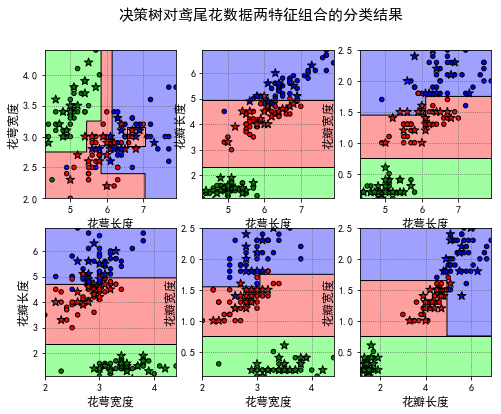

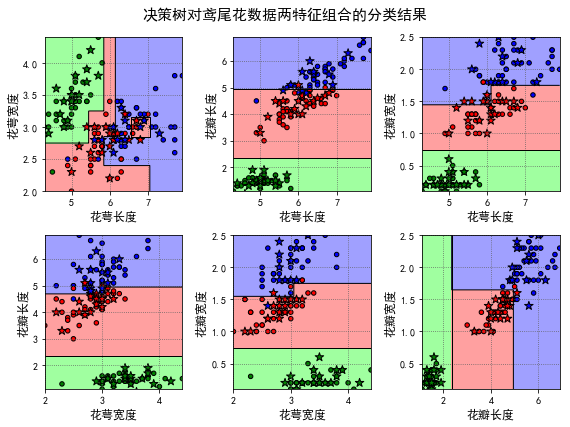

In [11]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

iris_feature = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
path = 'iris.data'
data = pd.read_csv(path,header=None)
x_prime = data[list(range(4))]
y = pd.Categorical(data[4]).codes
x_prime_train, x_prime_test, y_train, y_test = train_test_split(x_prime, y, test_size=0.3, random_state=0)
feature_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
plt.figure(figsize=(8,6),facecolor='#FFFFFF')
for i,pair in enumerate(feature_pairs):
    #准备数据
    x_train = x_prime_train[pair]
    x_test = x_prime_test[pair]
    
    #决策树学习
    model = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=3)
    model.fit(x_train,y_train)
    
    N,M = 500,500 # 纵横各采样多少个值
    x1_min,x2_min = x_train.min()
    x1_max,x2_max = x_train.max()
    t1 = np.linspace(x1_min,x1_max,N)
    t2 = np.linspace(x2_min,x2_max,M)
    x1,x2 = np.meshgrid(t1,t2) # 生成网格采样点
    x_show = np.stack((x1.flat,x2.flat),axis=1) # 测试点
    
    #训练集上的预测结果
    y_train_pred = model.predict(x_train)
    acc_train = accuracy_score(y_train,y_train_pred)
    y_test_pred = model.predict(x_test)
    acc_test = accuracy_score(y_test,y_test_pred)
    print('特征：',iris_feature[pair[0]],'+',iris_feature[pair[1]])
    print('\t 训练集准确率：%.4f%%' % (100*acc_train))
    print('\t 测试集准确率：%.4f%%' % (100*acc_test))
    
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = model.predict(x_show)
    y_hat = y_hat.reshape(x1.shape)
    plt.subplot(2,3,i+1)
    plt.contour(x1, x2, y_hat, colors='k', levels=[0, 1], antialiased=True, linewidths=1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x_train[pair[0]], x_train[pair[1]], c=y_train, s=20, edgecolors='k', cmap=cm_dark, label='训练集')
    plt.scatter(x_test[pair[0]], x_test[pair[1]], c=y_test, s=80, marker='*', edgecolors='k', cmap=cm_dark, label='测试集')
    plt.xlabel(iris_feature[pair[0]],fontsize=12)
    plt.ylabel(iris_feature[pair[1]],fontsize=12)
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    plt.grid(b=True,ls=':',color='#606060')
plt.suptitle('决策树对鸢尾花数据两特征组合的分类结果', fontsize=15)
plt.tight_layout(1,rect=(0,0,1,0.94)) # (left,bottom,right,top)
plt.show()